### Simulate Dynamic Systems in Python

A step response is a common evaluation of the dynamics of a simulated system. A linear time invariant (LTI) system can be described equivalently as a transfer function, a state space model, or solved numerically with and ODE integrator. This tutorial shows how to simulate a first order system in Python.

### First Order System Simulation

Consider a first order differential equation with constants $K_p=3$ and $\tau_p=2$, input $u$, and output response $y$.

$\tau_p \frac{dy}{dt} = -y + K_p u$

Three methods to represent this differential equation is as a (1) transfer function, (2) state space model, and (3) semi-explicit differential equation. Source code is included below to simulate a step response in these three forms.

1. Transfer Function

$\frac{Y(s)}{U(s)} = \frac{K_p}{\tau_p \,s + 1}$

2. State Space Model

$\dot x = A x + B u$

$y = C x + D u$

$A = -\frac{1}{\tau_p} \quad B = \frac{K_p}{\tau_p} \quad C=1 \quad D=0$

3. Differential Equation

$\frac{dy}{dt} = -\frac{1}{\tau_p} y + \frac{K_p}{\tau_p} u$

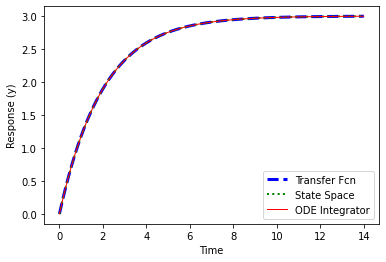

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulate taup * dy/dt = -y + K*u
Kp = 3.0
taup = 2.0

# (1) Transfer Function
num = [Kp]
den = [taup,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = -1.0/taup
B = Kp/taup
C = 1.0
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(y,t):
    u = 1
    return (-y + Kp * u)/taup
t3 = np.linspace(0,14,100)
y3 = odeint(model3,0,t3)

plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()